# Introduction of cartopy

Cartopy is one of the most popular packages for drawing maps in python. It is designed for geospatial data processing in order to produce maps and other geospatial data analyses. 

conda install -c conda-forge cartopy

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import shapely.geometry as sgeom
import numpy as np
import pandas as pd
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

## Sample map

- create a figure

- set projection and create a GeoAxes objects

- Call GeoAxes class to draw.

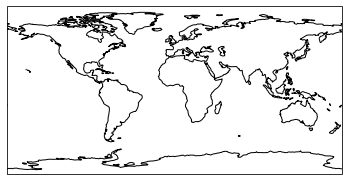

In [3]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.show() #default scale is 1:110 million 

## Useful methods of a GeoAxes
The cartopy.mpl.geoaxes.GeoAxes class adds a number of useful methods.

Let's take a look at:

- set_global - zoom the map out as much as possible

- set_extent - zoom the map to the given bounding box (x0, x1, y0, y1)

- set_xticks - Set the scale of the x-axis

- set_yticks - Set the scale of the y-axis

- gridlines - add a graticule (and optionally labels) to the axes

- coastlines - add Natural Earth coastlines to the axes

- stock_img - add a low-resolution Natural Earth background image to the axes

- imshow - add an image (numpy array) to the axes

- add_feature - add features to the map (such as land or ocean filling, rivers, etc.)

## Projection:

In Cartopy, each projection is a class, stored in the cartopy.crs module.

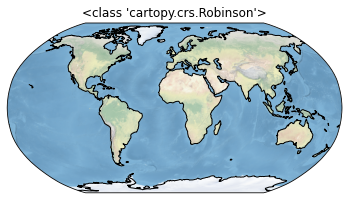

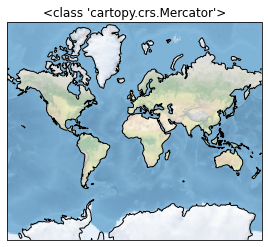

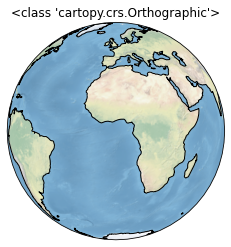

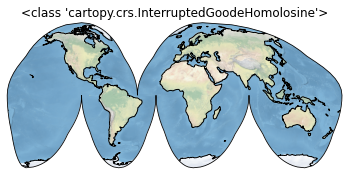

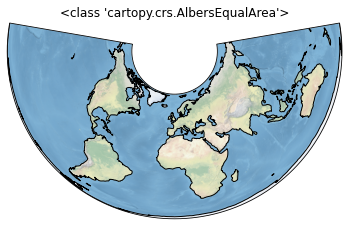

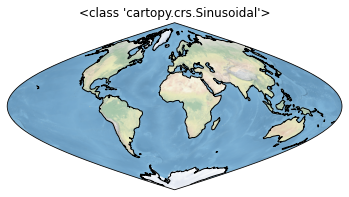

In [4]:
projections = [ccrs.Robinson(),
               ccrs.Mercator(),
               ccrs.Orthographic(),
               ccrs.InterruptedGoodeHomolosine(),
               ccrs.AlbersEqualArea(),
               ccrs.Sinusoidal()
              ]

for proj in projections:
    plt.figure()
    ax = plt.axes(projection = proj)
    ax.stock_img()
    ax.coastlines()
    ax.set_title(f'{type(proj)}')
    plt.show()

## feature

To greate more details in map. Some codes are lised.

- cartopy.feature.BORDERS 

- cartopy.feature.COASTLINE 

- cartopy.feature.LAKES 

- cartopy.feature.LAND 

- cartopy.feature.OCEAN 

- cartopy.feature.RIVERS 

In order to simplify some common situations, many feature has been pre-defined such as boarder, ocean, lands, etc.

## Example

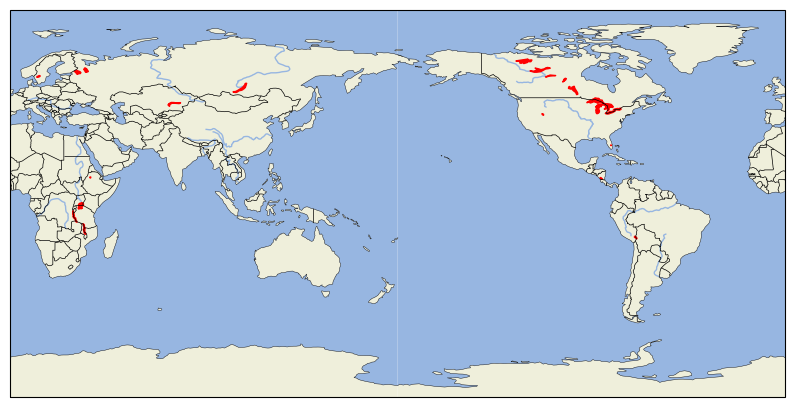

In [5]:
plt.figure(figsize = (10, 10), dpi = 100)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude = -180))#central at 180 degree longitude of the Pacific Ocean
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.RIVERS, lw = 1)
ax.add_feature(cfeature.LAKES, color='red')
ax.add_feature(cfeature.BORDERS, linestyle = '-',lw = 0.5)
ax.add_feature(cfeature.OCEAN)
ax.coastlines(lw=0.3) 
plt.show()

## Add latitude and longitude tags

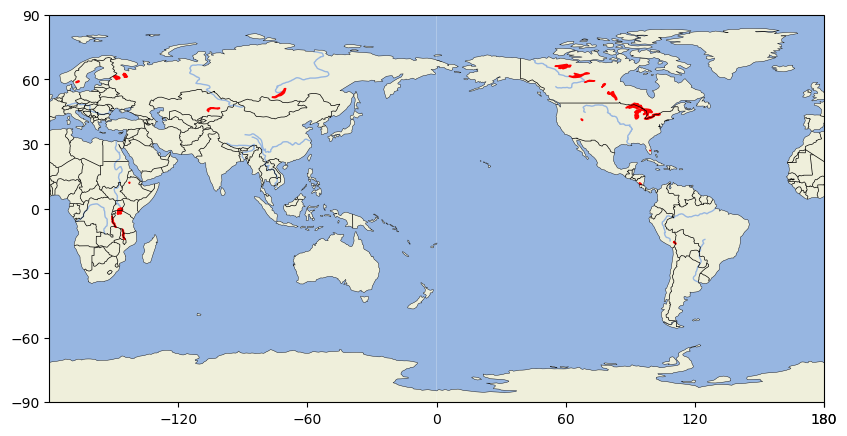

In [6]:
plt.figure(figsize = (10, 10), dpi = 100)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude = -180))#central at 180 degree longitude of the Pacific Ocean
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.RIVERS, lw = 1)
ax.add_feature(cfeature.LAKES, color='red')
ax.add_feature(cfeature.BORDERS, linestyle = '-',lw = 0.5)
ax.add_feature(cfeature.OCEAN)
ax.coastlines(lw=0.3)
x_extent = [0, 60, 120, 180, 240, 300, 360]
y_extent = [-90, -60, -30, 0, 30, 60, 90]
ax.set_xticks(x_extent, crs=ccrs.PlateCarree())
ax.set_yticks(y_extent, crs=ccrs.PlateCarree())
plt.show()

## title, lable and unit

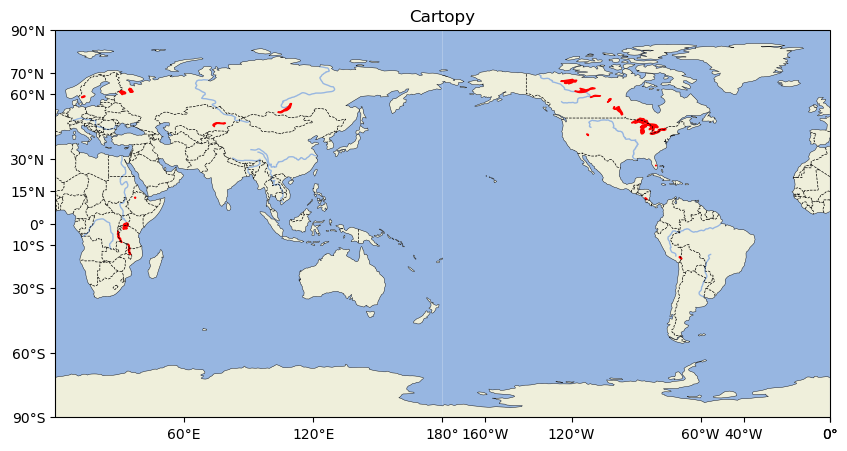

In [7]:
plt.figure(figsize = (10, 10), dpi = 100)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude = -180))#central at 180 degree longitude of the Pacific Ocean
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS, lw = 1) #make the width to 1
ax.add_feature(cfeature.LAKES, color='red') #make the color to red
ax.add_feature(cfeature.BORDERS, linestyle = '--',lw = 0.5) #change the line to make difference
ax.coastlines(lw=0.3)
x_extent = [0, 60, 120, 180, 200, 240, 300, 320, 360]
y_extent = [-90, -60, -30, -10, 0, 15, 30, 60, 70, 90]
ax.set_xticks(x_extent, crs=ccrs.PlateCarree())
ax.set_yticks(y_extent, crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter) #Use Formatter to format scale labels 
ax.set_title('Cartopy')
plt.show()

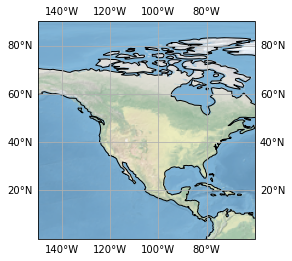

In [8]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([210, 300, 0, 90])
ax.coastlines()
ax.stock_img()
ax.gridlines(draw_labels=True)
plt.show()

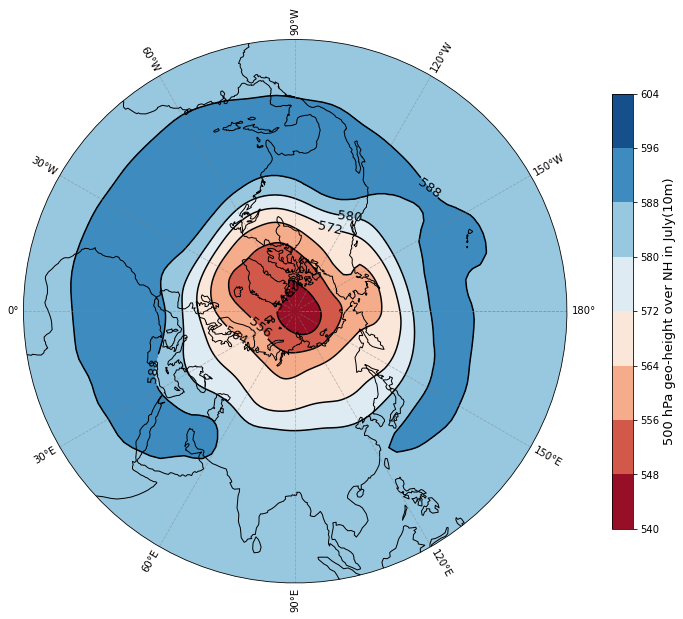

In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import matplotlib.path as mpath
import cartopy.feature
from cartopy.util import add_cyclic_point
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter)

fLoc = r"C:\Users\poiqw\Desktop\math385\hgt.mon.mean.nc"


def Draw500HgtJulyG():
    Hgt = xr.open_dataset(fLoc)["hgt"]
    time_label = (Hgt['time'].dt.year >= 1990) & (Hgt['time'].dt.year <= 2019) & \
                 (Hgt["time"].dt.month == 7)
    Hgt500Mean = Hgt[time_label].loc[dict(level=500.0)].mean("time").loc[:0, :]
    fig = plt.figure(figsize=(16, 10))
    lat = np.array(Hgt500Mean['lat'])
    lon = np.array(Hgt500Mean["lon"])
    proj = ccrs.NorthPolarStereo(central_longitude=90)
    ax = plt.axes(projection=proj)
    ax.coastlines()  
    ax.add_feature(cartopy.feature.LAND)
    theta = np.linspace(0, 2 * np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
    gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--',
                      xlocs=np.arange(-180, 181, 30), ylocs=[],
                      x_inline=False)
    gl.xformatter = LongitudeFormatter()
    gl.yformatter = LatitudeFormatter()
    cycleHgt500, cycle_lon = add_cyclic_point(np.array(Hgt500Mean), coord=lon)
    cycle_LON, cycle_LAT = np.meshgrid(cycle_lon, lat)
    m0 = ax.contourf(cycle_LON, cycle_LAT, cycleHgt500 / 10, levels=np.arange(540, 609, 8)
                     , cmap='RdBu',
                     transform=ccrs.PlateCarree()) 
    m1 = ax.contour(m0, levels=m0.levels, colors="k", transform=ccrs.PlateCarree())
    ax.clabel(m1, fmt='%2.0f', fontsize=13, colors="k")
    cbar = fig.colorbar(m0, shrink=0.8)
    cbar.set_label("500 hPa geo-height over NH in July(10m)", fontsize=13) 
    plt.show()

if __name__ == '__main__':
    Draw500HgtJulyG()

For more detail: 

https://github.com/SciTools/cartopy-tutorial 

https://scitools.org.uk/cartopy/docs/latest/gallery/index.html

https://scitools.org.uk/cartopy/docs/v0.15/index.html

Data:

https://psl.noaa.gov/data/gridded/data.ncep.reanalysis.html